# Bike Sharing Assignment (Case Study).


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands

## Importing Important libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# importing all the required libraries here as and when required during analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##  Data loading and data understanding

In [2]:
# Loading day.csv
df_bikeSharing = pd.read_csv("day.csv")

In [3]:
#Viewing first five rows of the dataset.
df_bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# There are 730 records and 16 columns in the given dataset.
df_bikeSharing.shape

(730, 16)

In [5]:
# There are no missing or null values.
# But we can see that dteday has has object datatype while season has datatype as int.
df_bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Let's have a look at the numerical data value range.
df_bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#size of data frame.
df_bikeSharing.size

11680

In [8]:
# Name of the columns
df_bikeSharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

## Data Cleaning

1. We will prepare the data for analysis.
2. To prepare for analysis we will remove all kind of irregularies inside data
   like missing values,redundant columns etc.

### Missing value check for dataset 

In [9]:
# From below we can infer that there are no missing or null values.
100 * df_bikeSharing.isnull().sum()/len(df_bikeSharing)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

### Dropping few columns which are not useful.

In [10]:
# Let's check now for the redundant columns.
# instant- It is just a record index it has no relation with the demand of the sharing bikes.
# dteday- It is a date(object type), analysis can be done based on month and year, i think date is not required at all.
# casual,registered - Their sum is equal to target variable i.e cnt. So they are not required.

df_bikeSharing.drop(['instant'],axis=1,inplace=True)
df_bikeSharing.drop(['dteday'],axis=1,inplace=True)
df_bikeSharing.drop(['casual'],axis=1,inplace=True)
df_bikeSharing.drop(['registered'],axis=1,inplace=True)

In [11]:
#Let's verify that the columns have been removed or not.
df_bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# We can see that season,mnth,weekday,weathersit are categorical data.
df_bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [13]:
# Let's check the values for season
#From dictionary- season : season (1:spring, 2:summer, 3:fall, 4:winter)
df_bikeSharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
#weekdays in the number format provided.
df_bikeSharing.weekday.value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [15]:
#checking values for month
df_bikeSharing.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [16]:
# checking values for weathersit, we can't see any value for 4 i.e during heavy rain.
#  weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

df_bikeSharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

### Converting season,mnth,weekday,weathersit to categorical data type

In [17]:
#changing season
df_bikeSharing.season=df_bikeSharing.season.replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [18]:
#changing mnth
df_bikeSharing.mnth = df_bikeSharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

In [19]:
#changing weekday
df_bikeSharing.weekday = df_bikeSharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

In [20]:
#changing weathersit
df_bikeSharing.weathersit=df_bikeSharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'worse'})

In [21]:
#let's verify the changes done above.
df_bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Handling outliers

In [22]:
df_bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [23]:
#creating list of variables with float values.
float_col=df_bikeSharing.columns[df_bikeSharing.dtypes=='float64'].tolist()
print(float_col)

['temp', 'atemp', 'hum', 'windspeed']


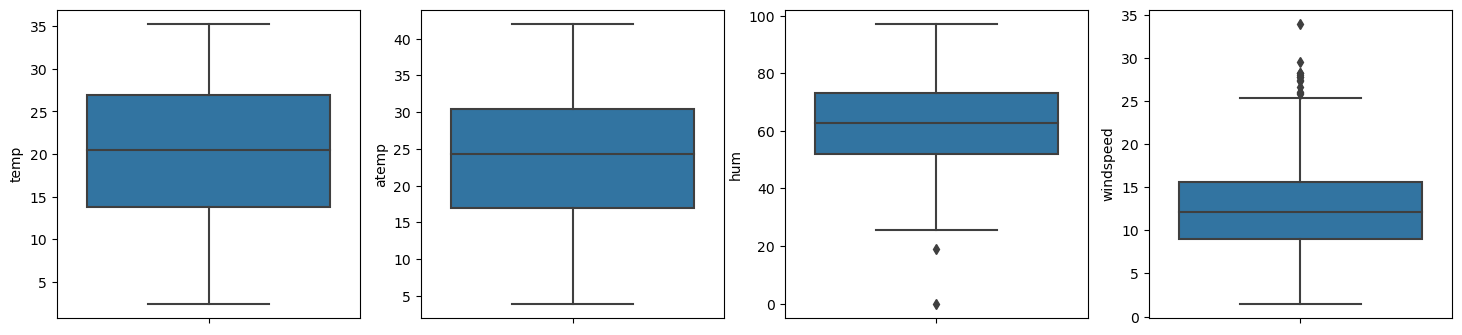

In [24]:
#plotting boxplot for variables with continuous values.
plt.figure(figsize=(18,4))

count=1
for col in float_col:
    plt.subplot(1,4,count)    
    sns.boxplot(y=col,data=df_bikeSharing)   
    count+=1
plt.show()

From above we can see that there are outliers in windspeed but 35 value cannot be considered as ouliers value. So assuming that 
there are no outliers as of now.

## Visualising the data.

Let's now spend some time visualising the data and finding the relation among them.
- If there is some multicollinearity going on, this is the first place to catch it
- Here we'll also identify if some association between target and the independant variables.

We'll visualise our data using `matplotlib` and `seaborn`.

In [25]:
#Creating list for continuous and the categorical columns for visualising the data.
col_continuous=['temp','atemp','hum','windspeed','cnt']
col_categorical=['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [26]:
df_bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Univariate Analysis

Countplot of season


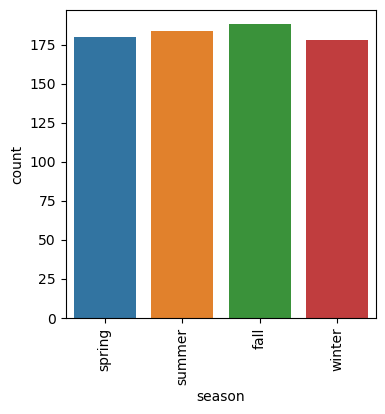

Countplot of yr


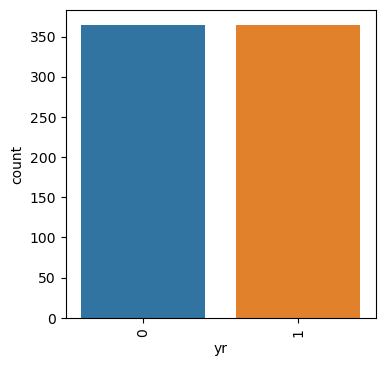

Countplot of mnth


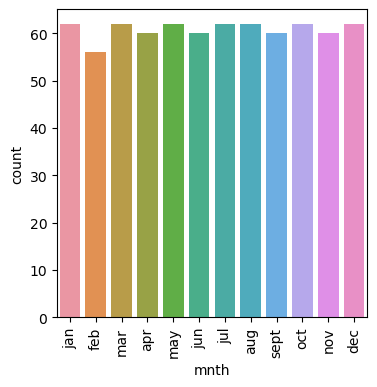

Countplot of holiday


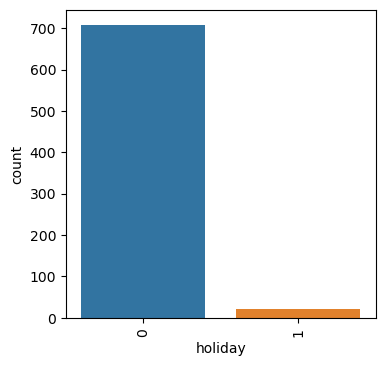

Countplot of weekday


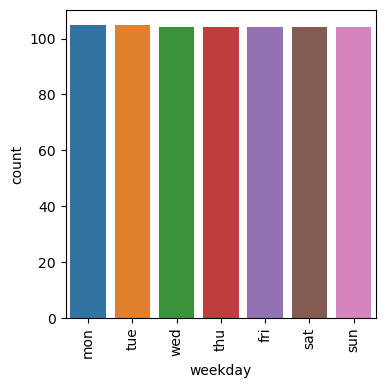

Countplot of workingday


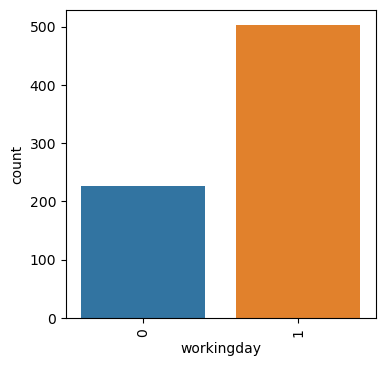

Countplot of weathersit


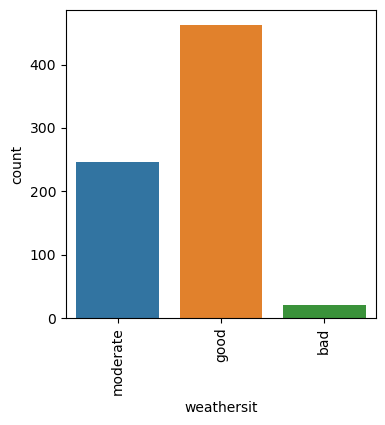

In [27]:
for i in col_categorical:
    print("Countplot of",i)
    plt.figure(figsize=(4,4))
    sns.countplot(x=df_bikeSharing[i])
    plt.xticks(rotation=90)
    plt.show()

### insights from the above countplot are:
1. Season fall has the max. number of counts of sharing bikes.
2. In 2018 and 2019 both year the demand was there for the sharing bikes but exact count will be clear in bivariate analysis
   when the target variable will be plotted against the year variable.
3. Month,weekday variable is not showing the clear picture right now it will be clear in bivariate analysis. 
4. When it is not holiday, huge amount of entries are made regarding the share bikes.
5. During working days sharing bike demands are more.
6. Good weather attracts more shared bikes demands it seems.

Boxplot of temp


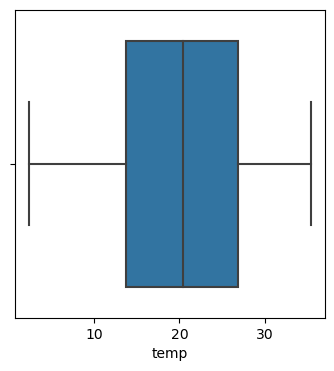

Boxplot of atemp


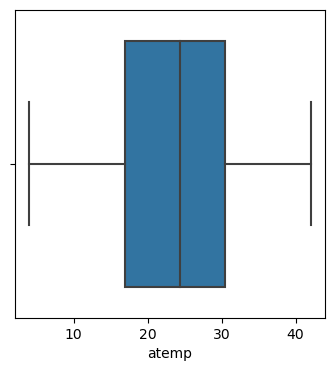

Boxplot of hum


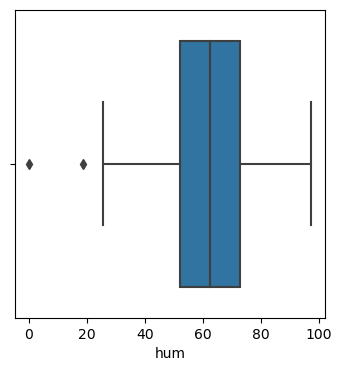

Boxplot of windspeed


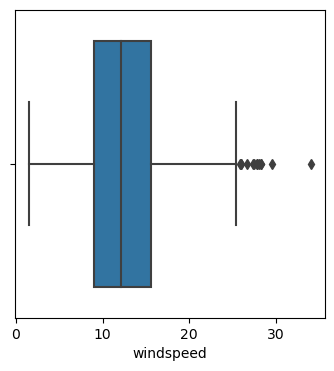

Boxplot of cnt


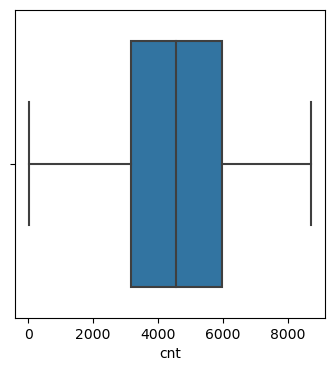

In [28]:
for i in col_continuous:
    plt.figure(figsize=(4,4))
    print("Boxplot of",i)
    sns.boxplot(x=df_bikeSharing[i])
    plt.show()

### Insight from Boxplot
1. Temp variable has 50% of the values below 20(in celcius).
2. Where as atemp variable has 50% of values below 25. But this range is slightly close to temp variable.
3. Humidity has 75% of values less than 70-75.
4. Windspeed has extreme value as of 35.
5. Target variable cnt has 75% of values below 6000. Max value is above 8000.

### Bivariate Analysis

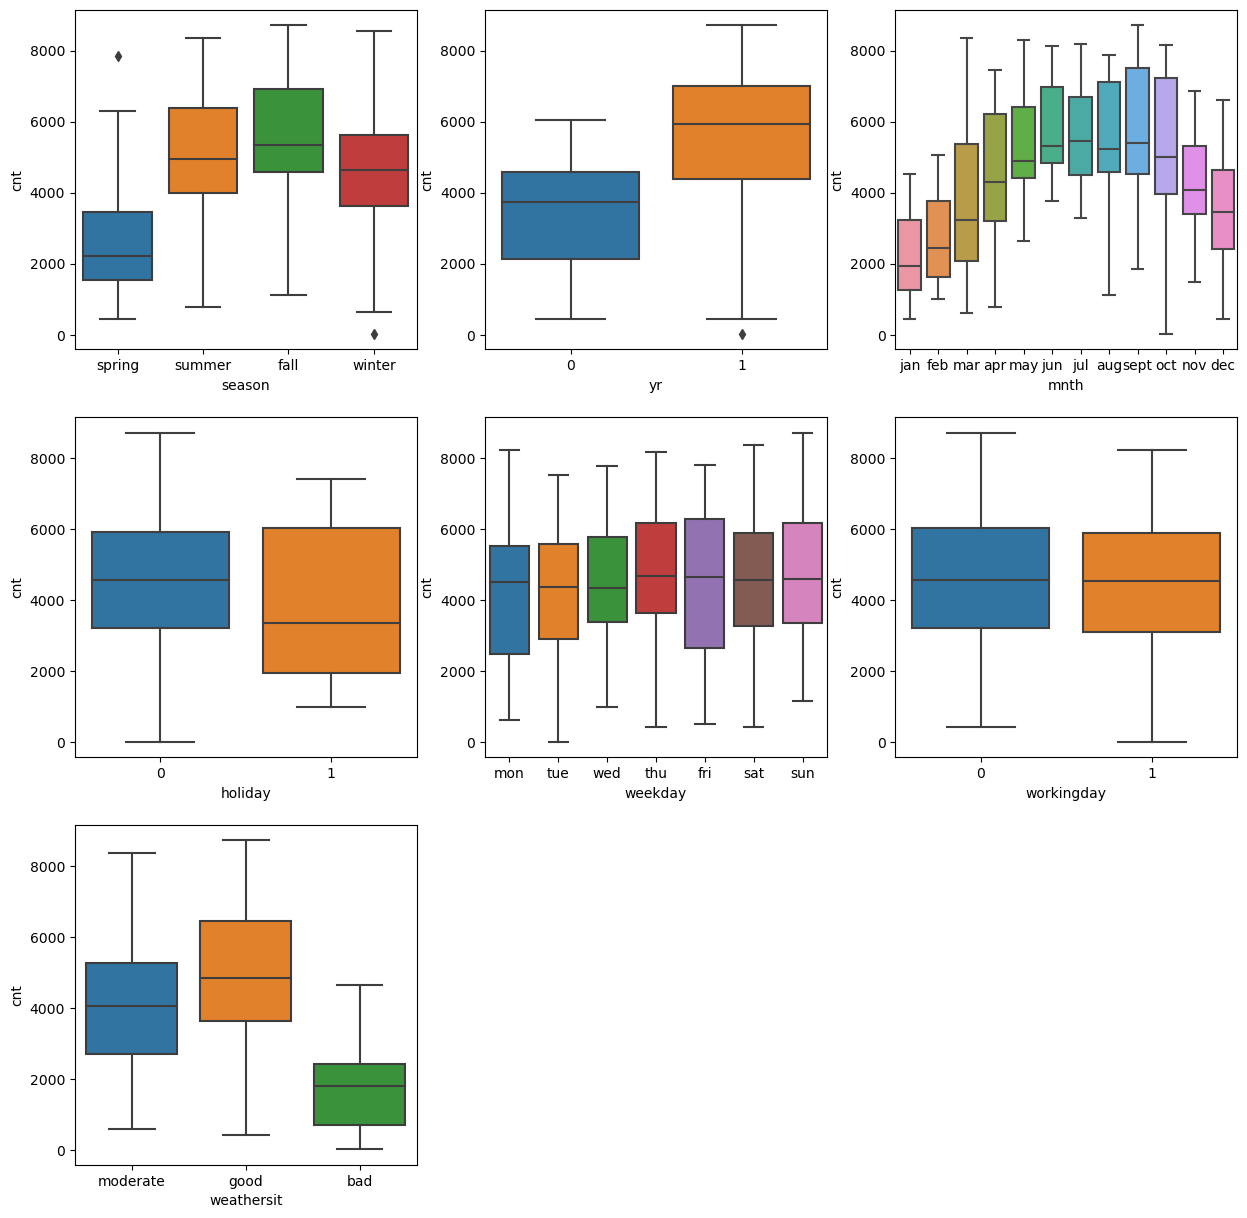

In [29]:
#plotting boxplot for all categorical data with target variable cnt.
plt.figure(figsize=(15,15))

count=1
for col in col_categorical:
    plt.subplot(3,3,count)    
    sns.boxplot(x=col,y='cnt',data=df_bikeSharing)   
    count+=1
plt.show()

Inference:
1. Season:Fall has maximum demand for shared bikes.
2. yr:2019 has more bike demands than 2018.
3. September month has the highest demand and the demand increases from Jan to Sep and then decreases.
4. When holiday is not there ,shared bikes are requested more.
5. Good weather has maximum demand for the shared bikes.In moderate weather also demand is there compared to bad weather.

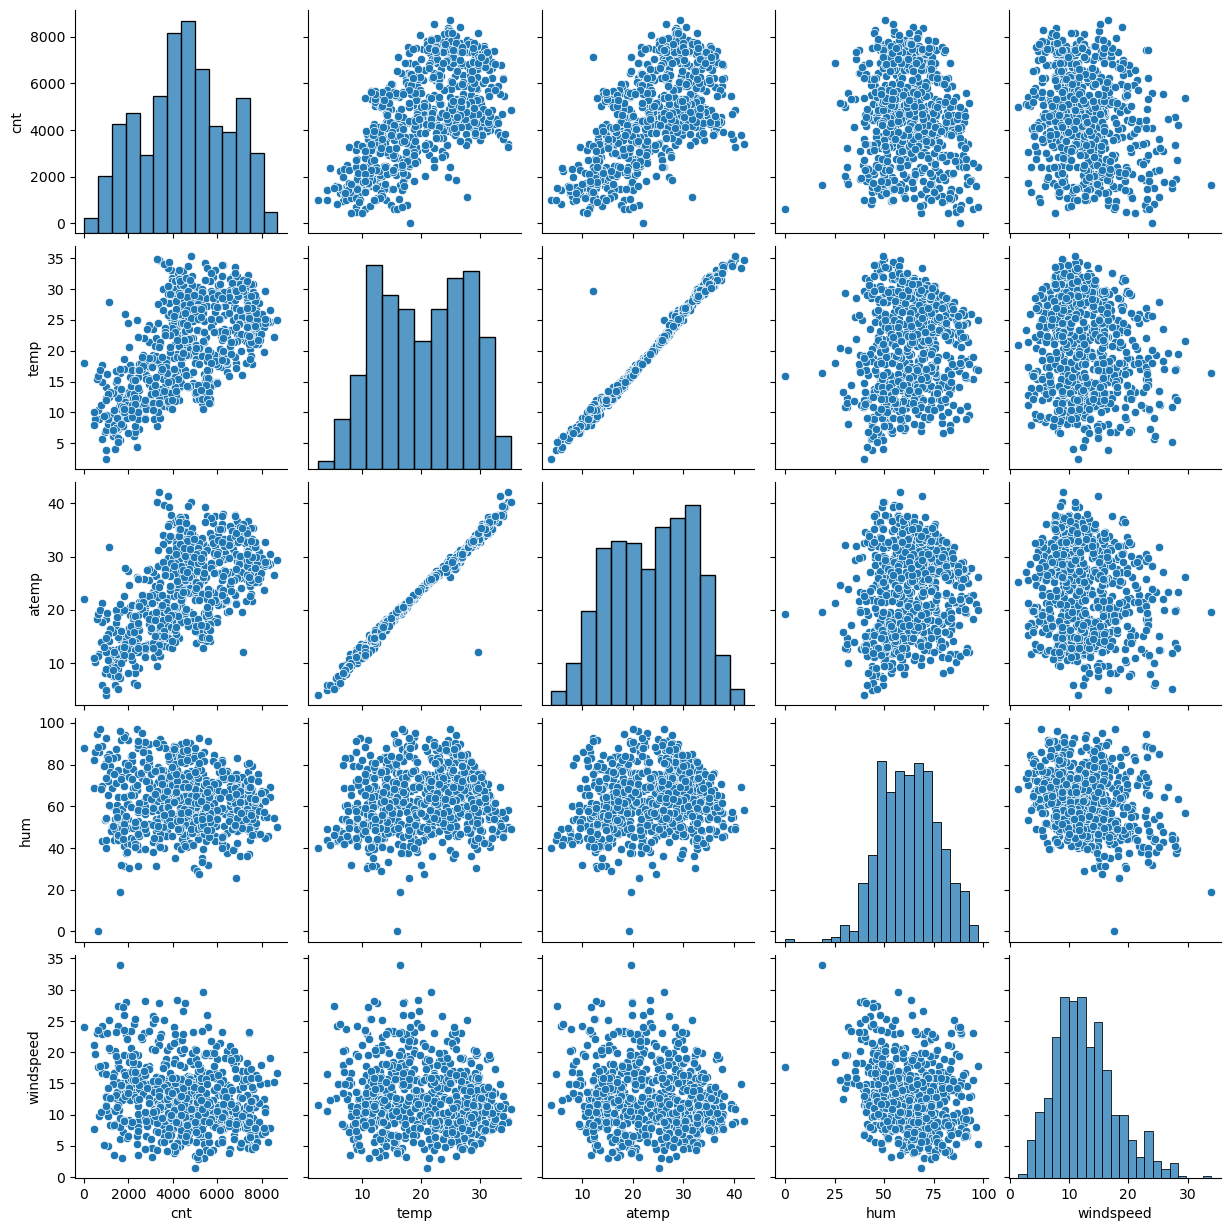

In [30]:
#plotting pairplot for all continuous data to check correlation with target variable cnt.
sns.pairplot(data=df_bikeSharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

Inferences:
1. We can see strong linear relationship between temp and atemp.
       This might be because the temperature felt and the temperature in celcius values are close.
2. We can notice the linear relationship between variable 'cnt' and 'temp'.
3. We can notice the linear relationship between variable 'cnt' and 'atemp'.

### Multivariate Analysis

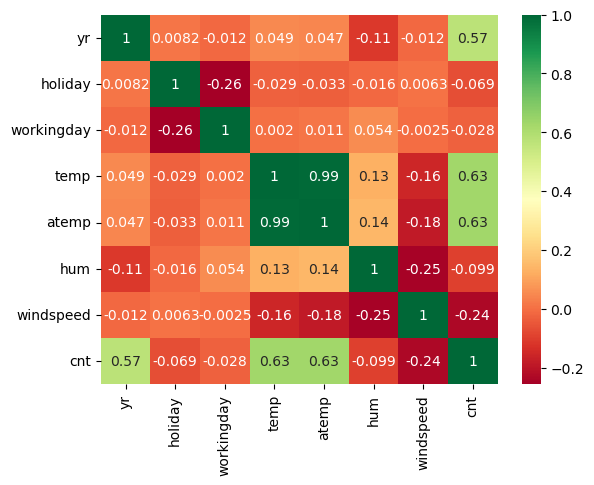

In [31]:
cor=df_bikeSharing.corr()
sns.heatmap(cor, cmap="RdYlGn", annot = True)
plt.show()

Inference:
1. temp and atemp variables are higly corelated. We can eliminate one later in the model based on VIF.
2. 'cnt' Target variable has linear relationship with temp and atemp.

## Data Preparation

### Creating dummy variables

In [32]:
#checking categorical variables to be converted to dummy variables.
df_bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [33]:
#creating dummy variables for season variable.
df_bikeSharing["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [34]:
#illustrating the formation of the dummy variable for the season without drop_first=True.
dum_season=pd.get_dummies(df_bikeSharing["season"])
dum_season.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [35]:
#illustrating the formation of the dummy variable for the season with drop_first=True.
dummy_season=pd.get_dummies(df_bikeSharing["season"],drop_first=True)
dummy_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [36]:
# creating dummy variables for three categorical column and deleting the first colum for each in one go
df_bikeSharing = pd.get_dummies(data=df_bikeSharing,columns=["season","mnth","weekday"],drop_first=True)
df_bikeSharing = pd.get_dummies(data=df_bikeSharing,columns=["weathersit"])

In [37]:
df_bikeSharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
# For Worse weather no data is there so it is not created. 
#But in future it may be there so not dropped the first column for the weathersituation.
df_bikeSharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

## Splitting the Data into Training and Testing Sets.

As we know, the first basic step for regression is performing a train-test split.

In [39]:
X=df_bikeSharing.drop(["cnt"],axis=1)
y=df_bikeSharing["cnt"]

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [41]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,0,0,1,...,0,0,0,0,0,0,1,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1,0,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,...,0,0,0,1,0,0,0,0,0,1


### Rescaling the Features 

In [42]:
#We will use Standard scaling.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)# As test data is unseen data we can't fit on it

In [43]:
#checking the values for X_train.
X_train

array([[ 0.98253988, -0.16156862,  0.63548891, ..., -0.17390209,
         0.77257686, -0.72482628],
       [ 0.98253988, -0.16156862,  0.63548891, ..., -0.17390209,
         0.77257686, -0.72482628],
       [ 0.98253988, -0.16156862, -1.57359158, ..., -0.17390209,
        -1.2943696 ,  1.37964093],
       ...,
       [-1.01777039, -0.16156862,  0.63548891, ..., -0.17390209,
        -1.2943696 ,  1.37964093],
       [-1.01777039, -0.16156862,  0.63548891, ..., -0.17390209,
        -1.2943696 ,  1.37964093],
       [ 0.98253988, -0.16156862,  0.63548891, ..., -0.17390209,
        -1.2943696 ,  1.37964093]])

In [44]:
#To process further we need to change them to dataframes again from numpy.
X_train_df=pd.DataFrame(X_train,columns=X.columns)
X_test_df=pd.DataFrame(X_test,columns=X.columns)

In [45]:
#checking the values .
X_train_df.head(2)

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0.98254,-0.161569,0.635489,-0.121991,-0.056605,-0.514975,-0.118309,-0.566051,-0.572078,1.738857,...,-0.295354,-0.427633,-0.385116,-0.39841,-0.408248,-0.424427,2.50998,-0.173902,0.772577,-0.724826
1,0.98254,-0.161569,0.635489,1.232298,1.194457,0.517177,-0.331370,-0.566051,-0.572078,-0.575091,...,-0.295354,-0.427633,-0.385116,-0.39841,-0.408248,-0.424427,2.50998,-0.173902,0.772577,-0.724826


### RFE
We are using hybrid approach for selecting features i.e manual and automated(Recursive feature elimination)
First we will use RFE to cut down features to 15 and then manually deducting the features upto 10 features.

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
#Running the RFE to get the 15 features out of 30
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

In [48]:
#From selector fitting the train set.
selector=selector.fit(X_train_df,y_train)
selector.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True,  True, False])

In [49]:
#Displaying the columns name which are selected by the RFE.
selected_features=X_train_df.columns[selector.support_]
print(selected_features)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_jan', 'mnth_oct', 'mnth_sept', 'weathersit_bad',
       'weathersit_good'],
      dtype='object')


In [50]:
#Updating the selected columns in X_train,X_test
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

## Modelling

In [51]:
#Using statsmodel to add constant to X_train,X_test
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [52]:
#building 1st model
model1=sm.OLS(np.array(y_train),X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     181.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          8.35e-190
Time:                        20:11:14   Log-Likelihood:                -4119.0
No. Observations:                 511   AIC:                             8270.
Df Residuals:                     495   BIC:                             8338.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.446    130.388      0.000    4423.625    4558.981
yr               1003.9723     35.090     28.611      0.000     935.028    1072.917
holiday          -145.6791     35.978     -4.049      0.000    -216.368     -74.991
workingday        -71.9439     35.918     -2.003      0.046    -142.514      -1.373
temp              935.2052     68.851     13.583      0.000     799.930    1070.481
hum              -210.2971     47.672     -4.411      0.000    -303.962    -116.632
windspeed        -278.6425     37.909     -7.350      0.000    -353.125    -204.160
season_spring     -89.6584     82.777     -1.083      0.279    -252.296      72.979
season_summer     326.9087     60.852      5.372      0.000     207.348     446.470
season_winter     404.8791     76.436      5.297      0.000     254.701     555.057
mnth_aug          127.8798     44.649      2.864      0.004      40.155     215.604
mnth_jan          -92.5632     43.177     -2.144      0.033    -177.396      -7.731
mnth_oct          107.1911     42.539      2.520      0.012      23.611     190.771
mnth_sept         281.2813     40.738      6.905      0.000     201.240     361.322
weathersit_bad   -280.6726     36.703     -7.647      0.000    -352.786    -208.559
weathersit_good   237.7363     44.091      5.392      0.000     151.109     324.364
==============================================================================
Omnibus:                       76.438   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.302
Skew:                          -0.781   Prob(JB):                     4.27e-40
Kurtosis:                       5.465   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#calculating VIF and displaying it.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.037782
2,holiday,1.090949
3,workingday,1.087307
4,temp,3.995250
5,hum,1.915403
6,windspeed,1.211184
7,season_spring,5.774970
8,season_summer,3.120932
9,season_winter,4.924016


#### Inference From model1:
    1. Prob (F-statistic):	8.35e-190 which is very small and can be accepted.
    2. P-value is smaller than 0.05 for all the variables.
    3. VIF value must be less than 5. But season_spring has VIF more than 5.
    4. R-square and adjusted R-square are more than 80 percent.
    Lets remove season_spring and check.
    

In [54]:
X_train_sm=X_train_sm.drop(["season_spring"],axis=1)
X_test_sm=X_test_sm.drop(["season_spring"],axis=1)

In [55]:
model2=sm.OLS(np.array(y_train),X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.06e-190
Time:                        20:11:14   Log-Likelihood:                -4119.6
No. Observations:                 511   AIC:                             8269.
Df Residuals:                     496   BIC:                             8333.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.452    130.365      0.000    4423.614    4558.993
yr               1000.9158     34.983     28.612      0.000     932.183    1069.649
holiday          -146.5848     35.975     -4.075      0.000    -217.266     -75.903
workingday        -71.4395     35.921     -1.989      0.047    -142.016      -0.863
temp              987.6548     48.952     20.176      0.000     891.475    1083.834
hum              -217.1344     47.261     -4.594      0.000    -309.990    -124.279
windspeed        -282.9498     37.706     -7.504      0.000    -357.033    -208.866
season_summer     374.5998     42.011      8.917      0.000     292.058     457.141
season_winter     468.2604     49.183      9.521      0.000     371.627     564.894
mnth_aug          145.4685     41.598      3.497      0.001      63.738     227.199
mnth_jan          -96.4292     43.037     -2.241      0.025    -180.986     -11.873
mnth_oct          101.2742     42.195      2.400      0.017      18.372     184.176
mnth_sept         295.8167     38.471      7.689      0.000     220.230     371.403
weathersit_bad   -277.5754     36.598     -7.584      0.000    -349.482    -205.669
weathersit_good   234.5124     43.998      5.330      0.000     148.068     320.957
==============================================================================
Omnibus:                       71.982   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.460
Skew:                          -0.755   Prob(JB):                     5.28e-36
Kurtosis:                       5.313   Cond. No.                         2.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.031070
2,holiday,1.090360
3,workingday,1.087124
4,temp,2.018947
5,hum,1.881819
6,windspeed,1.197856
7,season_summer,1.486970
8,season_winter,2.038052
9,mnth_aug,1.457908


#### Inference From model2:
     
    1. Prob (F-statistic) is very small and can be accepted.
    2. P-value is smaller than 0.05 for all the variables.
    3. VIF value is less than 5 for all variables.
    4. R-square and adjusted R are more than 80 percent.
    From above we can see workingday has highest p-value 0.047 ,let's remove and build next model.

In [57]:
X_train_sm=X_train_sm.drop(["workingday"],axis=1)
X_test_sm=X_test_sm.drop(["workingday"],axis=1)

In [58]:
model3=sm.OLS(np.array(y_train),X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.1
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          5.11e-191
Time:                        20:11:14   Log-Likelihood:                -4121.6
No. Observations:                 511   AIC:                             8271.
Df Residuals:                     497   BIC:                             8331.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.554    129.979      0.000    4423.413    4559.193
yr               1000.7316     35.087     28.522      0.000     931.795    1069.668
holiday          -127.9840     34.841     -3.673      0.000    -196.437     -59.531
temp              990.4458     49.078     20.181      0.000     894.021    1086.871
hum              -223.8573     47.280     -4.735      0.000    -316.750    -130.965
windspeed        -284.2641     37.812     -7.518      0.000    -358.556    -209.972
season_summer     371.9783     42.115      8.832      0.000     289.233     454.723
season_winter     464.9569     49.301      9.431      0.000     368.092     561.822
mnth_aug          145.5520     41.722      3.489      0.001      63.579     227.525
mnth_jan          -96.5983     43.164     -2.238      0.026    -181.405     -11.792
mnth_oct          101.4361     42.320      2.397      0.017      18.288     184.584
mnth_sept         296.7737     38.582      7.692      0.000     220.969     372.578
weathersit_bad   -277.7572     36.707     -7.567      0.000    -349.876    -205.638
weathersit_good   224.8434     43.858      5.127      0.000     138.673     311.013
==============================================================================
Omnibus:                       67.348   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.697
Skew:                          -0.698   Prob(JB):                     5.71e-35
Kurtosis:                       5.337   Cond. No.                         2.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns
vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.031063
2,holiday,1.016660
3,temp,2.017288
4,hum,1.872192
5,windspeed,1.197488
6,season_summer,1.485506
7,season_winter,2.035727
8,mnth_aug,1.457906
9,mnth_jan,1.560450


#### Inference From model3:
     
    1. Prob (F-statistic) is very small and can be accepted.
    2. P-value is smaller than 0.05 for all the variables.
    3. VIF value is less than 5 for all variables.
    4. R-square and adjusted R are more than 80 percent.
    If we aim to specify top 10 variables influencing bike sharing then we must cut short the model
    ,let's check heat map and deduct some more features.

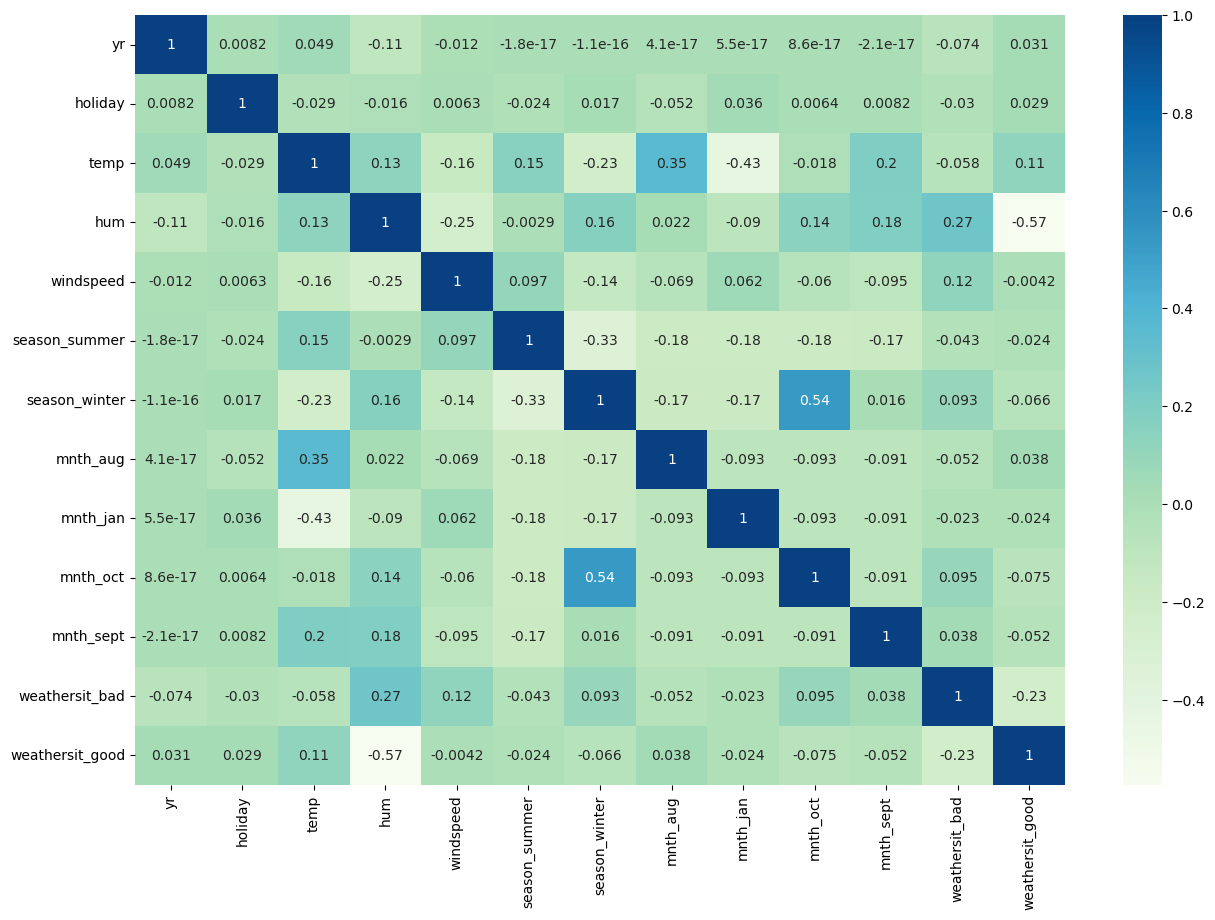

In [60]:
#Let's check the correlation among the variables using heat map and try to build next model.
plt.figure(figsize=(15,10))
sns.heatmap(df_bikeSharing[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_aug','mnth_jan', 'mnth_oct', 'mnth_sept', 'weathersit_bad',
       'weathersit_good']].corr(), cmap='GnBu', annot=True)
plt.show()

In [61]:
#From heat map we can see that mnth_oct and season_winter has highest coefficient.
# season_winter has VIF=2.03 which can be reduced if the mnth_oct is dropped. Let's try and check the effect.

X_train_sm=X_train_sm.drop(["mnth_oct"],axis=1)
X_test_sm=X_test_sm.drop(["mnth_oct"],axis=1)

In [62]:
model4=sm.OLS(np.array(y_train),X_train_sm)
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          5.77e-191
Time:                        20:11:15   Log-Likelihood:                -4124.5
No. Observations:                 511   AIC:                             8275.
Df Residuals:                     498   BIC:                             8330.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.718    129.364      0.000    4423.091    4559.516
yr                999.3231     35.248     28.351      0.000     930.069    1068.577
holiday          -130.0596     34.995     -3.716      0.000    -198.816     -61.303
temp             1012.9993     48.396     20.931      0.000     917.914    1108.085
hum              -218.5120     47.451     -4.605      0.000    -311.742    -125.282
windspeed        -278.3408     37.911     -7.342      0.000    -352.826    -203.856
season_summer     366.6403     42.256      8.677      0.000     283.619     449.662
season_winter     520.7636     43.664     11.927      0.000     434.976     606.551
mnth_aug          136.3772     41.743      3.267      0.001      54.362     218.392
mnth_jan          -88.6199     43.240     -2.049      0.041    -173.576      -3.664
mnth_sept         282.6273     38.309      7.377      0.000     207.359     357.895
weathersit_bad   -269.8630     36.732     -7.347      0.000    -342.032    -197.694
weathersit_good   223.7210     44.064      5.077      0.000     137.147     310.295
==============================================================================
Omnibus:                       57.841   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.998
Skew:                          -0.625   Prob(JB):                     2.65e-28
Kurtosis:                       5.098   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.030774
2,holiday,1.016032
3,temp,1.943134
4,hum,1.868026
5,windspeed,1.192373
6,season_summer,1.481352
7,season_winter,1.581706
8,mnth_aug,1.445635
9,mnth_jan,1.551170


#### Inference From model4:
     
    1. Prob (F-statistic) is very small and can be accepted.
    2. P-value is smaller than 0.05 for all the variables.P-value for mnth_jan got increased.
    3. VIF value is less than 5 for all variables.
    4. R-square and adjusted R are more than 80 percent.
    5. After removing mnth_oct we saw that the VIF value for season_winter got reduced.
    Let's remove mnth_jan as it has max p-value=0.04

In [64]:
#Removing mnth_jan variable
X_train_sm=X_train_sm.drop(["mnth_jan"],axis=1)
X_test_sm=X_test_sm.drop(["mnth_jan"],axis=1)

In [65]:
model5=sm.OLS(np.array(y_train),X_train_sm)
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          2.92e-191
Time:                        20:11:15   Log-Likelihood:                -4126.7
No. Observations:                 511   AIC:                             8277.
Df Residuals:                     499   BIC:                             8328.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     34.829    128.951      0.000    4422.873    4559.734
yr                995.3791     35.309     28.191      0.000     926.007    1064.751
holiday          -131.0375     35.104     -3.733      0.000    -200.008     -62.067
temp             1058.2441     43.205     24.493      0.000     973.357    1143.131
hum              -225.8021     47.469     -4.757      0.000    -319.067    -132.538
windspeed        -270.7639     37.851     -7.153      0.000    -345.131    -196.397
season_summer     389.7970     40.848      9.543      0.000     309.543     470.051
season_winter     557.2122     40.005     13.928      0.000     478.612     635.812
mnth_aug          141.1552     41.812      3.376      0.001      59.007     223.304
mnth_sept         288.4079     38.328      7.525      0.000     213.104     363.712
weathersit_bad   -265.6864     36.793     -7.221      0.000    -337.975    -193.398
weathersit_good   223.4315     44.205      5.054      0.000     136.581     310.282
==============================================================================
Omnibus:                       56.444   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.869
Skew:                          -0.611   Prob(JB):                     1.27e-27
Kurtosis:                       5.079   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.027702
2,holiday,1.015843
3,temp,1.538807
4,hum,1.857529
5,windspeed,1.181034
6,season_summer,1.375438
7,season_winter,1.319308
8,mnth_aug,1.441126
9,mnth_sept,1.210977


#### Inference From model5:
     
    1. Prob (F-statistic) is very small and can be accepted.
    2. P-value is smaller than 0.05 for all the variables.
    3. VIF value is less than 5 for all variables.
    4. R-square and adjusted R are more than 80 percent.
  Let's check next highest correlation coefficients in heat map.mnth_aug and temp has max. correlation.
  If we remove the mnth_aug then it might reduce the VIF of temp as well.

In [67]:
#Remove mnth_aug and build next model
X_train_sm=X_train_sm.drop(["mnth_aug"],axis=1)
X_test_sm=X_test_sm.drop(["mnth_aug"],axis=1)

In [68]:
model6=sm.OLS(np.array(y_train),X_train_sm)
res6=model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.5
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          4.87e-190
Time:                        20:11:15   Log-Likelihood:                -4132.5
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     500   BIC:                             8334.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4491.3033     35.190    127.631      0.000    4422.165    4560.441
yr                996.8526     35.671     27.946      0.000     926.769    1066.936
holiday          -133.9878     35.456     -3.779      0.000    -203.650     -64.326
temp             1118.9562     39.691     28.192      0.000    1040.974    1196.938
hum              -223.2979     47.955     -4.656      0.000    -317.515    -129.081
windspeed        -275.5149     38.216     -7.209      0.000    -350.599    -200.431
season_summer     339.5551     38.434      8.835      0.000     264.044     415.066
season_winter     527.0875     39.401     13.378      0.000     449.676     604.499
mnth_sept         251.9513     37.155      6.781      0.000     178.951     324.951
weathersit_bad   -271.6557     37.131     -7.316      0.000    -344.607    -198.704
weathersit_good   212.8860     44.550      4.779      0.000     125.357     300.415
==============================================================================
Omnibus:                       60.383   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.701
Skew:                          -0.671   Prob(JB):                     8.35e-28
Kurtosis:                       5.014   Cond. No.                         2.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                 for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.027545
2,holiday,1.015213
3,temp,1.272208
4,hum,1.857075
5,windspeed,1.179401
6,season_summer,1.192863
7,season_winter,1.253670
8,mnth_sept,1.114846
9,weathersit_bad,1.113359


#### Inference From model6:
     
    1. Prob (F-statistic) is very small and can be accepted.
    2. P-value is smaller than 0.05 for all the variables.
    3. VIF value is less than 5 for all variables.
    4. R-square=83 and adjusted R-square =83 which is more than 80 percent.
    This model is good to go.

## Residual Analysis and prediction

#### Error terms are normally distributed with mean value zero.


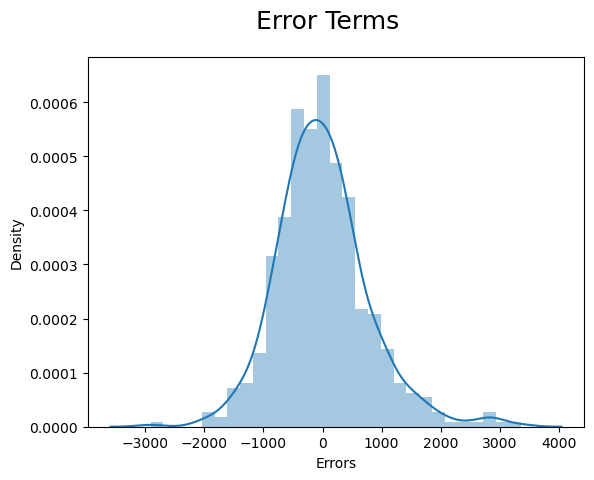

In [70]:
#plotting distplot to confirm the assumption.
#We can see the normal distribution of error terms with mean value=0

residuals=res6.predict(X_train_sm)-y_train.reset_index(drop=True)
fig = plt.figure()
sns.distplot(residuals)
fig.suptitle('Error Terms', fontsize = 18)
plt.xlabel('Errors')
plt.show()

#### Inference:Normal distribution of error terms can be seen with mean value=0.


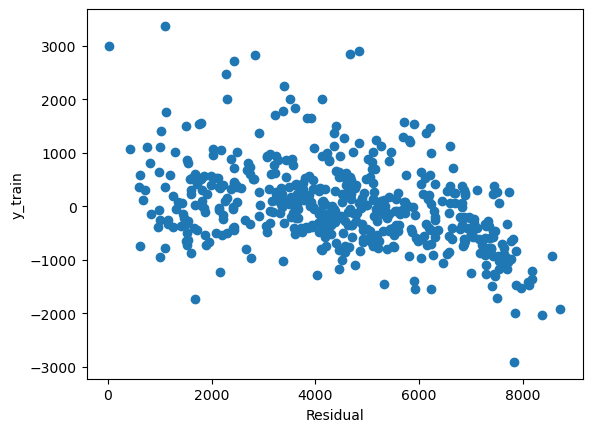

In [71]:
#Look for patterns in residuals(We should not be able to identify)
plt.scatter(y_train,residuals)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Inference: No patterns are found.

In [72]:
y_train_pred = res6.predict(X_train_sm)
y_train_pred

0      6363.060164
1      6487.021526
2      4342.808638
3      3358.552097
4      5215.455572
          ...     
506    6925.807752
507    2145.892246
508    2413.160919
509    2607.343529
510    5757.090635
Length: 511, dtype: float64

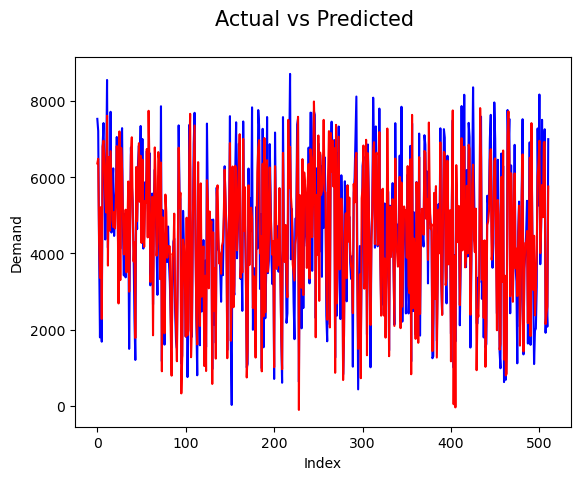

In [73]:
x_train=np.arange(0,len(X_train),1)
plt.plot(x_train,y_train,color='blue')
plt.plot(x_train,y_train_pred,color='red')
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demand')
plt.show()

#### Inference : Actual and predicted shows the same pattern.

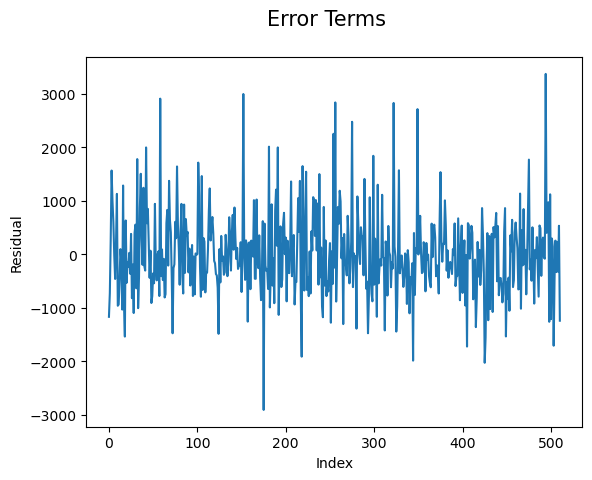

In [74]:
x_train=np.arange(0,len(X_train),1)
plt.plot(x_train,residuals)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Residual')
plt.show()

#### Inference:
    Error terms are independant of each other.

#### R-square value and adjusted R-square value must be close.
R-square=0.837
Adjusted R-square=0.834

## Model prediction

### R-square value for train and test data

In [75]:
#Calculating predicted Y_train data value
y_train_pred = res6.predict(X_train_sm)

# R-square value of the train data
from sklearn.metrics import r2_score
r2_score(y_train,y_train_pred)

0.8374216482656823

In [76]:
#Calculating predicted Y_test data value
y_test_pred = res6.predict(X_test_sm)

# R-square value of the test data
r2_score(y_test,y_test_pred)

0.8047033362900088

#### Inference:
    R-square value of train data=83.7
    R-square value of test data=80.4
    Diffenece is less than 5. So the model build is considered to a good model.

Text(0, 0.5, 'y_test_pred')

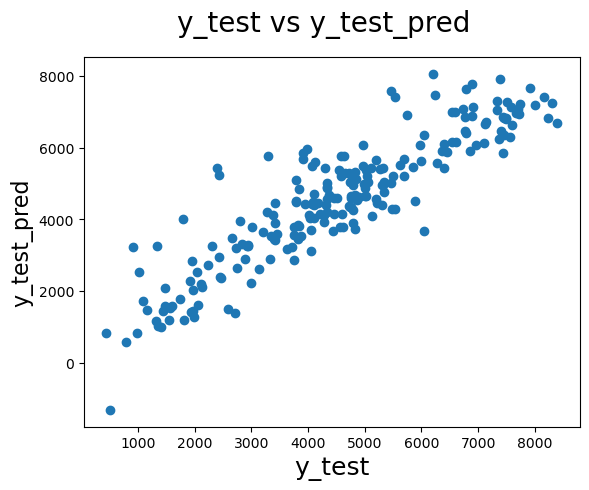

In [77]:
#Visualising the test set.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)

### Inference:
     The model is doing great job as we can plot the line by looking at above plot.

### Linear Regression Model (Line of best fit)
cnt = 996.85 * yr - 133.98 * holiday + 1118.95 * temp - 223.29 * hum - 275.51 * windspeed  + 339.55 * season_summer +                 527.08 * season_winter + 251.95 * mnth_sep  - 271.65 * weathersit_bad  + 212.88 * weathersit_good + 4491.30

## Suggestion:

1. Year 2019 has more demand than 2018. It seems when the situation becomes normal the demand will increase
   in coming years. Company must focus on more marketting schemes.
2. Few things have negative relationship with the demand like holiday, humidity.
3. When there is bad weather,more windspeed company can expect decline in the demand for shared bikes.
4. Usually september month has maximum bookings, Company can provide more schemes during this month.

## Conclusion:
### Significant variable in predicting the demands are:

1. year(yr) 
2. holiday
3. temp
4. hum
5. windspeed
6. season(summer,winter)
7. mnth_sep
8. weathersit(bad,good)